<a href="https://colab.research.google.com/github/rubygitflow/Higher-Math/blob/main/University_of_Artificial_Intelligence_Basic_Mathematics_Lesson_10_Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Спектр сигнала

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline

### Лекция

In [2]:
# Как работает DFT

def DFT(x):
    """DFT of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


# Как работает FFT
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 16:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

Задача 1. Найдем модуль и аргумент спектра для следующего сигнала x(nT) = [-1, 2, 0, 1, 3, 3, 2, 0].



In [3]:
#Из библиотеки scipy используем пакет fftpack, который содержит основные функции для расчета DFT

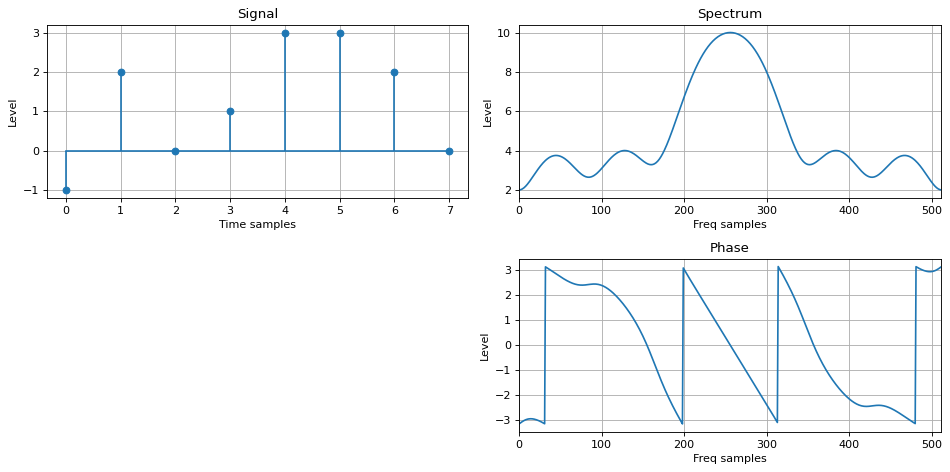

In [4]:
# цифровой сигнал
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])


#  FFT на 512 отсчетах
N = 512
xFFT = fftshift(fft(x, N)) # Функция fftshift фактически просто центрирует график в диапазоне -pi/2 +pi/2 будем использовать ее для отображения на графике
# Модуль Спектра (Амплитудный домен)
xA = np.abs(xFFT)
# Аргумент спектра (Фазовый домен)
xF = np.angle(xFFT)

# Список графиков
xT = [x, xA, xF]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Выводим результаты
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

Задача 2. Отобразим спектр суммы гармонических сигналов .

Сигнал состоит из трех гармонических компонент (косинус).
Амплитуды сигналов: 5, 1, 3
Частоты сигналов:  2, 7, 12

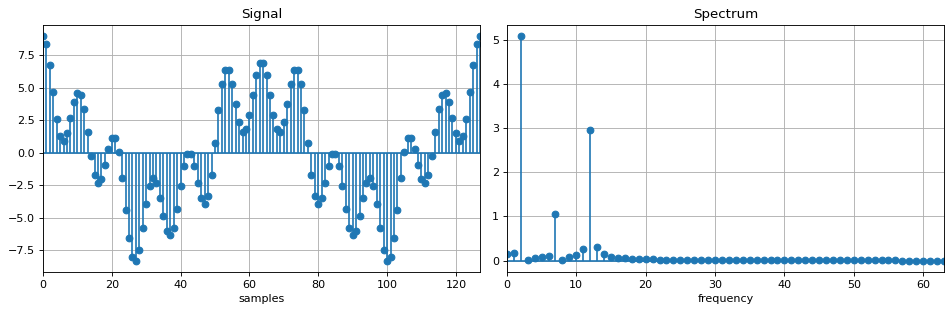

In [5]:
N = 128 # Зададим количество отсчетов
t = np.linspace(0, 1, N)

# Зададим Амплитуды и Частоты
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

x = A1 * np.cos(2*np.pi*f1*t) + A2 * np.cos(2*np.pi*f2*t) + A3 * np.cos(2*np.pi*f3*t)

# Расчитываем  FFT
X = fft(x)
X = 2*np.abs(X) / N # Выводим амплитудную характеристику, нормализуем по N

# Выводим результаты
fig = plt.figure(figsize=(12, 4), dpi=80)
# Сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Частотный спектр
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

# На получившемся спектре ясно видны 3 пика соответствующие амплитудам составляющих сигнал грамонических компонент, расположение пиков на оси x соответствует частотам гармонических компонент

Задача 3
Вывести графически спектр периодической последовательности {1, 1, 1}, если её повторить 4 раза через число каждые 9 тактов.

In [6]:
N = 9    # Период сигнала
M = 4    # Кол-во повторений сигнала

# Зададим сам сигнал, представляющий гребенку Дирака длиной 3
x = np.zeros(N)
x[0:3] = 1

# Повторим сигнал M раз
y = np.tile(x, M)
y

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0.])

Max. Amplitude: 12.0


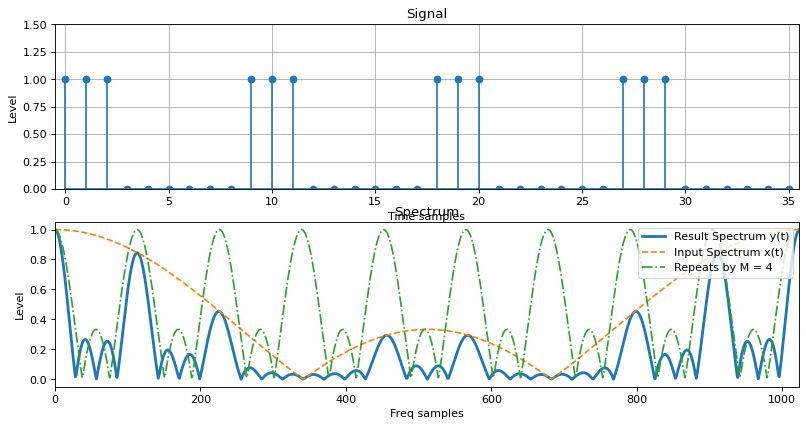

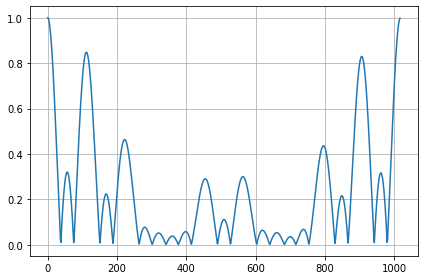

In [7]:
# Считаем FFT для повторенного сигнала на 1024 отсчетах для вывода
NFFT = 1024
xFFT = fft(y, NFFT)

# Модуль Спектра (Амплитудный домен)
yA = np.abs(xFFT)
print('Max. Amplitude: {}'.format(yA.max()))
yA /= np.max(yA) # Нормируем
# Аргумент Cпектра (Фазовый домен)
yF = np.angle(xFFT)
#=====================================

# Находим по шагам спектр периодической последовательности

# Считаем FFT для исходного сигнала на 1024 отсчетах (спектр исходной последовательности | X(ejωT) |)
xFFT = fft(x, NFFT)
# Модуль Спектра (Амплитудный домен)
xA = np.abs(xFFT)
xA /= np.max(xA)

# FFT длz множителя повторений (спектр множителя повторения | M(ejωT) |)
xFFT = fft(x, NFFT//N) # Разделим интервал на N частей (период сигнала),
# Модуль Спектра (Амплитудный домен)
xM = np.abs(xFFT)
xM /= np.max(xM) #Каждую часть интервалов разбить на M частей (период повторения),
xM = np.tile(xM, N) 
#List of signals
xT = [y, yA]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 1, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.ylim([0, 1.5])
        plt.xlim([-0.5, N*M-0.5])
    else:
        
        plt.plot(sig, '-', linewidth=2.5, label='Result Spectrum y(t)')
        #plt.show()
        plt.plot(xA, '--', linewidth=1.5, label='Input Spectrum x(t)')
        #plt.show()
        plt.plot(xM, '-.', linewidth=1.5, label='Repeats by M = %d' % M)
        plt.xlabel('Freq samples')
        plt.xlim([0, NFFT-1])
        plt.legend(loc='upper right')

        plt.show()
        # Перемножить спектры | M(ejωT) | и | X(ejωT) |, получив спектр периодической последовательности с периодом N и числом повторений М.
        plt.plot(xA[:1017]* xM, '-', linewidth=1.5, label='Spectrum of repeated periodic signal')
        
        #plt.show()
        
    plt.grid()
plt.tight_layout()

- Разделить интервал на N частей (период сигнала),
- Каждую часть интервалов разбить на M частей (период повторения),
- Найти модуль спектра множителя повторения | M(ejωT) |,
- Найти спектр исходной последовательности | X(ejωT) |,
- Перемножить спектры | M(ejωT) | и | X(ejωT) |, получив спектр периодической последовательности с периодом N и числом повторений М.

Задача 4 - 
Найти поворотные множители:
$W_{k,n} = e^{\frac{-2\pi j}{N}nk}$
и построить графики реальной и мнимой части матрицы при N = 8.

[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


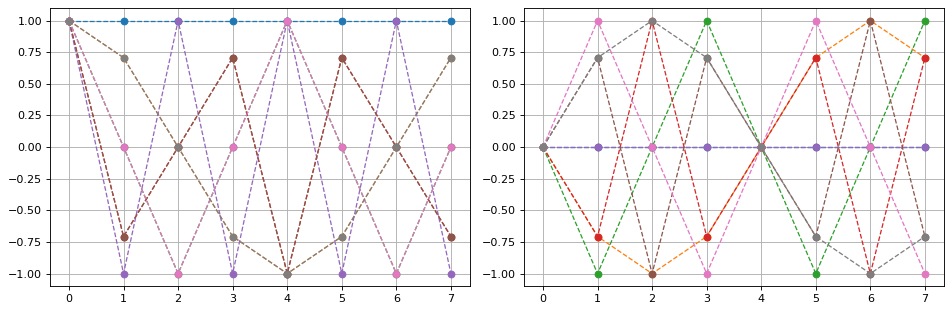

In [8]:
# матрица DFT устроена так: первые строка и столбец состоят из единиц, 
# во второй строке стоят корни из единицы порядка n в естественном порядке, следующие строки являются 
# последовательными степенями второй строки. В качестве примера приведем матрицу размерностью 4х4.


N = 8
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Считаем поворотные множители по формуле
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)


# ВЫводим поворотные множители
fig = plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 2, 1)
for i in range(N):
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.subplot(1, 2, 2)
for i in range(N):
    plt.plot(np.imag(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.tight_layout()

### ДЗ Лайт

Задача 1.

Найдите модуль и аргумент спектра для следующего сигнала  [5,3,0,0,0,-1,3, 3, 5, 0].




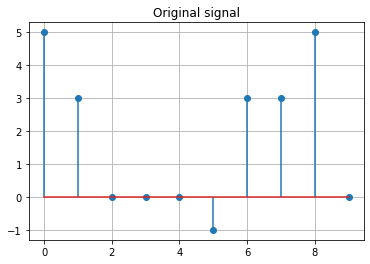

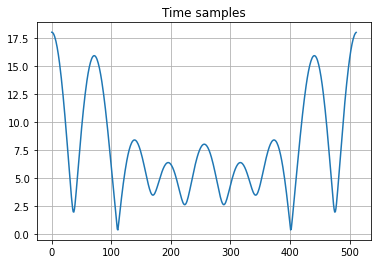

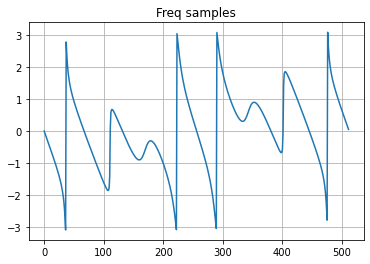

In [9]:
# Преобразование цифрового сигнала в массив
x = np.array([5, 3, 0, 0, 0, -1, 3, 3, 5, 0])
N = 512     # кол-во отсчетов

# Быстрое дискретное преобразование Фурье с использованием модуля fftpack
xFFT = fft(x, N)

# Нахождение модуля спектра
xA = np.abs(xFFT)

# Нахождение аргумента спектра
xF = np.angle(xFFT)

plt.stem(x, use_line_collection=True)
plt.title('Original signal')
plt.grid()
plt.show()

plt.plot(xA)
plt.title('Time samples')
plt.grid()
plt.show()

plt.plot(xF)
plt.title('Freq samples')
plt.grid()
plt.show()

Задача 2.

Найдите модуль и аргумент спектра для следующего сигнала гармонического сигнала:
синус (np.sin)
С Частотой 20Гц
Амплитудой 3
И фазой 1



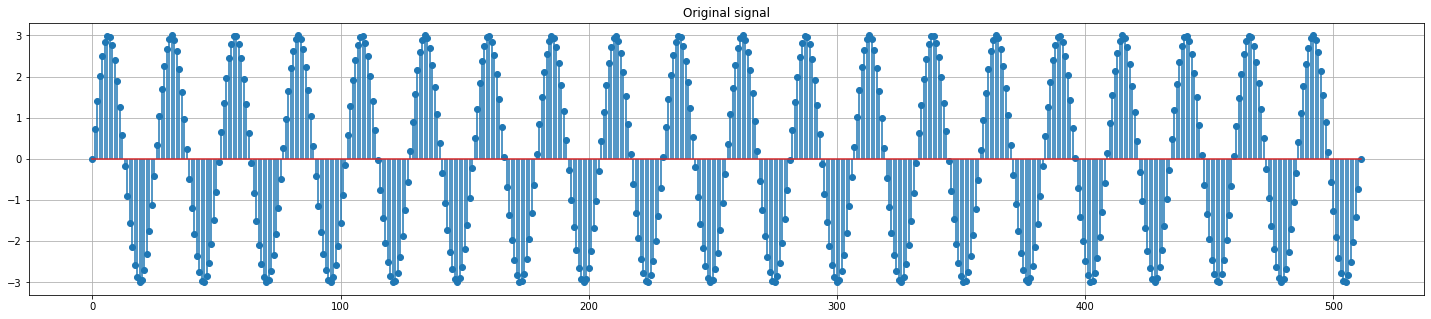

In [24]:
N = 512
x = np.linspace(0, 1, N) 

A = 3
F = 20
Phi = 0
func = A * np.sin(2 * np.pi * F * x + Phi)

fig = plt.figure(figsize=(25, 5))
plt.stem(func, use_line_collection=True)
plt.title('Original signal')
plt.grid()
plt.show()

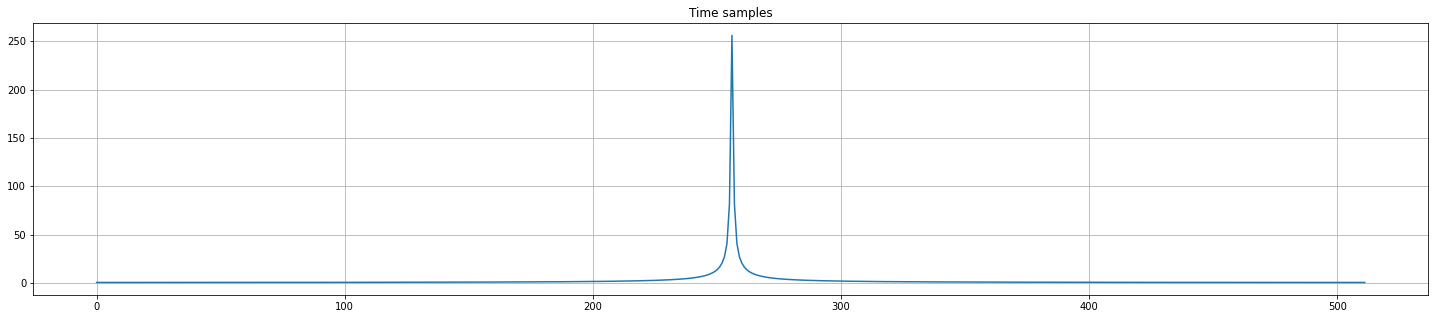

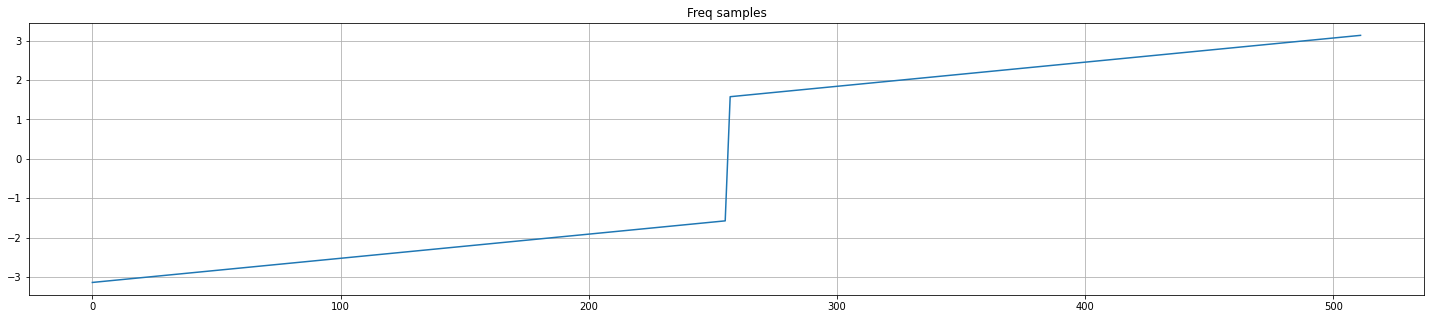

In [25]:

xFFT = fftshift(fft(x, N)) 
# Модуль Спектра (Амплитудный домен)
xA = np.abs(xFFT)
# Аргумент спектра (Фазовый домен)
xF = np.angle(xFFT)


fig = plt.figure(figsize=(25, 5))
plt.plot(xA)
plt.title('Time samples')
plt.grid()
plt.show()

fig = plt.figure(figsize=(25, 5))
plt.plot(xF)
plt.title('Freq samples')
plt.grid()
plt.show()

Задача 3.

Дан сложный сигнал состаящий из 4-х гармонических компонент (синус) с различными значениями амплитуд и частот.
Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих

сигнал (50 отсчетов):
[ 0.00000000e+00,  6.61225969e+00,  3.25848078e+00, -1.20084548e+00,
        3.45301249e+00,  8.94406332e+00,  4.69738850e+00, -1.36112077e+00,
        2.18739790e+00,  8.35228095e+00,  5.25735866e+00, -1.07697134e+00,
        1.30202985e+00,  6.87594476e+00,  3.25150704e+00, -4.69190350e+00,
       -3.88118391e+00,  2.10527395e+00,  3.66950398e-01, -6.14121684e+00,
       -4.38906614e+00,  3.21326193e+00,  3.07651304e+00, -3.62470149e+00,
       -3.41879558e+00,  3.41879558e+00,  3.62470149e+00, -3.07651304e+00,
       -3.21326193e+00,  4.38906614e+00,  6.14121684e+00, -3.66950398e-01,
       -2.10527395e+00,  3.88118391e+00,  4.69190350e+00, -3.25150704e+00,
       -6.87594476e+00, -1.30202985e+00,  1.07697134e+00, -5.25735866e+00,
       -8.35228095e+00, -2.18739790e+00,  1.36112077e+00, -4.69738850e+00,
       -8.94406332e+00, -3.45301249e+00,  1.20084548e+00, -3.25848078e+00,
       -6.61225969e+00, -1.78798433e-14]



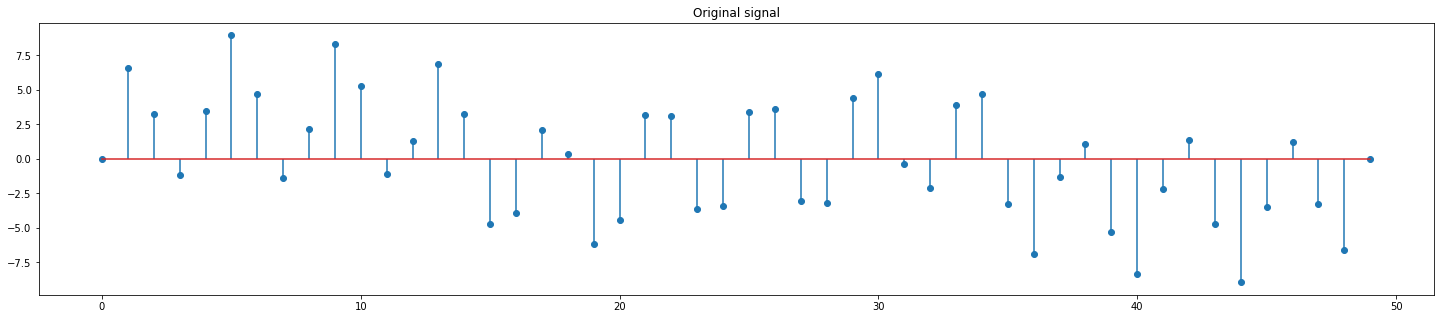

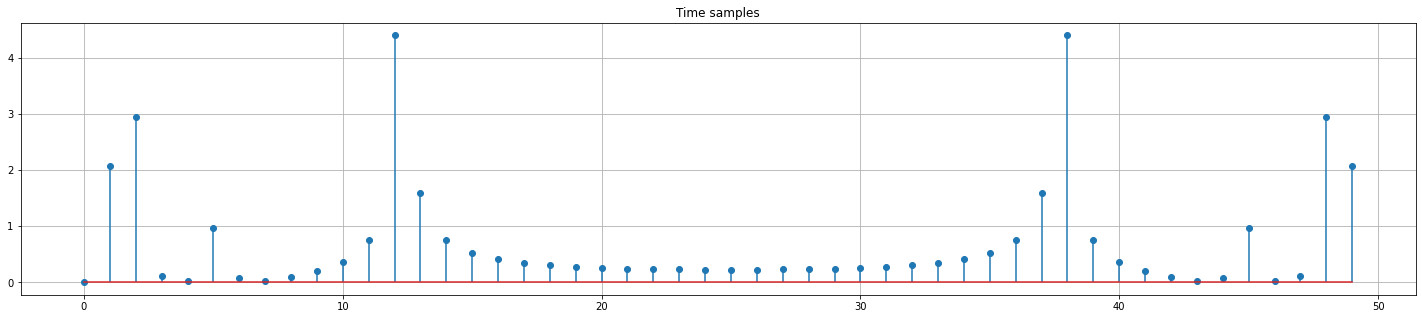

In [28]:
# исходный сигнал
x = [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00, 4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00, 1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00, 3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00, -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00, 6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00, -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00, 1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00, -6.61225969e+00, -1.78798433e-14 ]

# кол-во отсчетов
N = len(x)

# преобразование в массив np.ndarray
x = np.array(x)

# вывод графика
plt.figure(figsize=(25, 5))
plt.stem(x, use_line_collection=True)
plt.title('Original signal')
plt.show()

# Расчитываем  FFT
X = fft(x, N)
funcA = 2*np.abs(X) / N # Выводим амплитудную характеристику, нормализуем по N

fig = plt.figure(figsize=(25, 5))
plt.stem(funcA, use_line_collection=True)
plt.title('Time samples')
plt.grid()
plt.show()


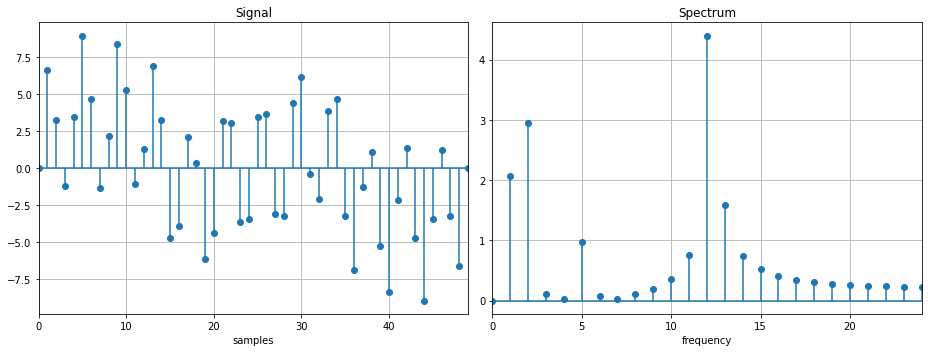

In [32]:
# Берем частоты по всплеская на оси X и Амплитуда на оси Y
f1, f2, f3,f4 = 1, 2, 5, 12
A1, A2, A3, A4 = 2, 3, 1, 5

# Проверяем наши выводы:

N = 50 # Зададим количество отсчетов
t = np.linspace(0, 1, N)

x = A1 * np.sin(2*np.pi*f1*t) + A2 * np.sin(2*np.pi*f2*t) + A3 * np.sin(2*np.pi*f3*t) + A4 * np.sin(2*np.pi*f4*t)

# Расчитываем  FFT
X = fft(x)
X = 2*np.abs(X) / N # Выводим амплитудную характеристику, нормализуем по N

# Выводим результаты
fig = plt.figure(figsize=(13, 5))
# Сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Частотный спектр
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

#Вывод : - Частоты подобраны верно

Задача 4.

Дан сложный сигнал состаящий из 3-х  гармонических компонент (синус или косинус) с различными значениями амплитуд и частот.
Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих, определите тип гармоники(синус или косинус) для каждой из 3-х компонент (проведите эксперимент с различными вариантами и сравните значение сигнала с исходным)

сигнал (50 отсчетов):
[  5.        ,   4.30526129,   1.1866465 ,   3.34419258,
        10.00175533,  12.72445008,   7.37131056,   0.0960048 ,
        -1.20272739,   2.21503056,   2.21621125,  -4.07157369,
        -9.71396009,  -7.58050005,  -0.40551554,   3.07649777,
         0.39794335,  -1.49186919,   3.35463826,  10.87420288,
        12.35793581,   6.57965819,   1.38169525,   2.47423629,
         5.47331895,   2.54081727,  -5.92788684, -11.36114918,
        -8.80486753,  -3.64474877,  -3.69070938,  -7.98002116,
        -8.32372238,  -1.35817361,   6.19266981,   6.64041356,
         1.85933344,   0.22340262,   4.39208947,   7.45673738,
         2.96889512,  -5.52028152,  -9.10569348,  -5.77531161,
        -2.80654995,  -5.9539219 , -10.95865216,  -9.56752755,
        -1.45998542,   5.        ]




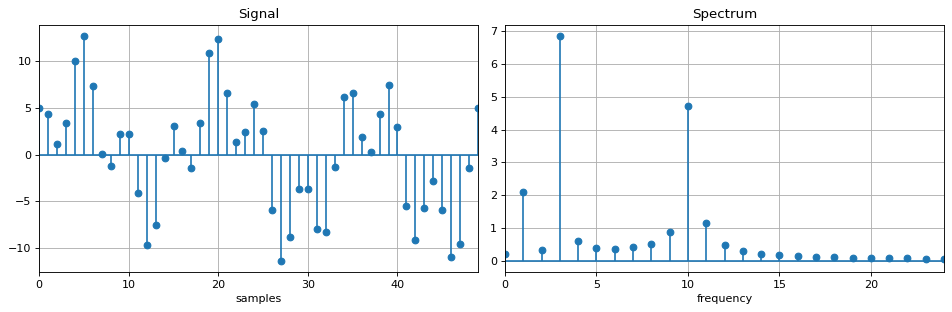

In [33]:

N = 50
x = np.array([5. , 4.30526129, 1.1866465 , 3.34419258, 10.00175533, 12.72445008, 7.37131056, 0.0960048 , -1.20272739, 2.21503056, 2.21621125, -4.07157369, -9.71396009, -7.58050005, -0.40551554, 3.07649777, 0.39794335, -1.49186919, 3.35463826, 10.87420288, 12.35793581, 6.57965819, 1.38169525, 2.47423629, 5.47331895, 2.54081727, -5.92788684, -11.36114918, -8.80486753, -3.64474877, -3.69070938, -7.98002116, -8.32372238, -1.35817361, 6.19266981, 6.64041356, 1.85933344, 0.22340262, 4.39208947, 7.45673738, 2.96889512, -5.52028152, -9.10569348, -5.77531161, -2.80654995, -5.9539219 , -10.95865216, -9.56752755, -1.45998542, 5. ])
x_ref = x

# Расчитываем  FFT
X = fft(x, N)
X = 2*np.abs(X) / N # Выводим амплитудную характеристику, нормализуем по N

# Выводим результаты
fig = plt.figure(figsize=(12, 4), dpi=80)
# Сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Частотный спектр
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()


<ufunc 'sin'> <ufunc 'sin'> <ufunc 'cos'>


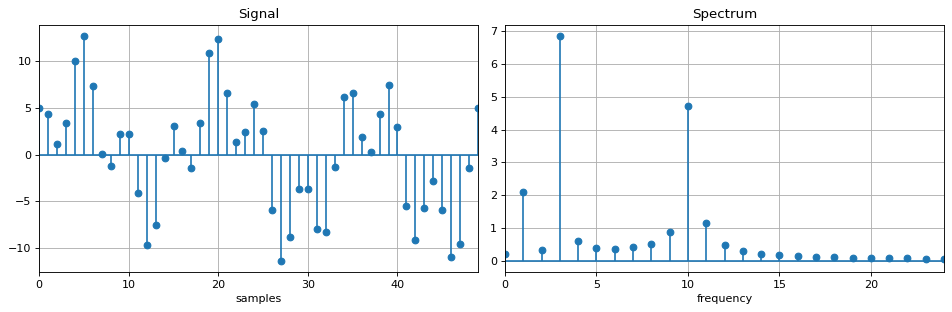

In [34]:
# Подберём сигнал путем сравнения различных конфигураций с исходным x_ref:

search_harm = [np.sin,np.cos]

N = 50 # Зададим количество отсчетов
t = np.linspace(0, 1, N)

# Зададим Амплитуды и Частоты
f1, f2, f3  = 1, 3, 10
A1, A2, A3 = 2, 7, 5
for term in search_harm:
  for term2 in search_harm:
    for term3 in search_harm:
      
      x = A1 * term(2*np.pi*f1*t) + A2 * term2(2*np.pi*f2*t) + A3 * term3(2*np.pi*f3*t) 
      if np.isclose(x,x_ref).all(): # Сравнивать напрямую 2 float чмассива в питоне нельзя, будут ошибки приведения точности, поэтому мы используем оператор isclose
        print (term,term2,term3)
        
        x_found = x

        # Расчитываем  FFT
        X = fft(x_found)
        X = 2*np.abs(X) / N # Выводим амплитудную характеристику, нормализуем по N

        # Выводим результаты
        fig = plt.figure(figsize=(12, 4), dpi=80)
        # Сигнал
        plt.subplot(1, 2, 1)
        plt.title('Signal')
        plt.stem(x, use_line_collection=True, basefmt='C0')
        plt.xlim([0, N-1])
        plt.xlabel('samples')
        plt.grid()

        # Частотный спектр
        plt.subplot(1, 2, 2)
        plt.title('Spectrum')
        plt.stem(X, use_line_collection=True, basefmt='C0')
        plt.xlim([0, N//2-1])
        plt.xlabel('frequency')
        plt.grid()
        plt.tight_layout()

Задача 5.

Дан периодический сигнал [1,1,3,2,1] c периодом 12 и кол-вом повторений 6.
Получите и выведите спект периодической последовательности, используя алгоритм из занятия:
- Разделить интервал на N частей (период сигнала),
- Каждую часть интервалов разбить на M частей (период повторения),
- Найти модуль спектра множителя повторения | M(ejωT) |,
- Найти спектр исходной последовательности | X(ejωT) |,
- Перемножить спектры | M(ejωT) | и | X(ejωT) |, получив спектр периодической последовательности с периодом N и числом повторений М



In [35]:
n = 12    # период сигнала
m = 6     # кол-во повторений

# задаём сигнал
x = np.zeros(n)   # массив размера n, составленный из нулей
x[:5] = [1,1,3,2,1]
print(x)

# составляем последовательность
y = np.tile(x, m)
print(y)

[1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0.]


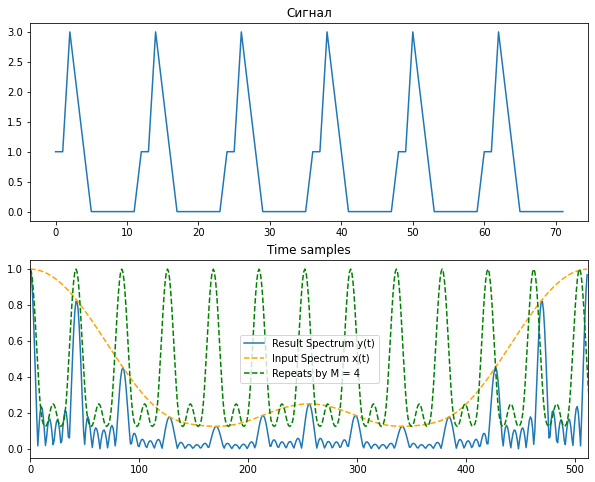

In [37]:
N = 512   # кол-во осчетов

# вычисляем модуль спектра всего сигнала
yFFT = fft(y, N)
yA = np.abs(yFFT) / np.max(np.abs(yFFT))

# вычисляем модуль спектра пошагово
# сначала спектр повторяющейся последовательности
xFFT = fft(x, N)
xA = np.abs(xFFT) / np.max(np.abs(xFFT))

# потом спектр для множителя повторений
xFFT = fft(x, N // n)
xM = np.abs(xFFT) / np.max(np.abs(xFFT))
xM = np.tile(xM, N) 

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(y, ls='-')
plt.title('Сигнал')

plt.subplot(212)
plt.plot(yA, ls='-', label = 'Result Spectrum y(t)')
plt.plot(xA, ls='--', c='orange', label='Input Spectrum x(t)')
plt.plot(xM, ls='--', c='green', label='Repeats by M = %d' % M)
plt.xlim(0, N)
plt.legend()
plt.title('Time samples')
plt.show()



Задача 6

Постройте графики реальной части матрицы поворотных множителей для N = 32.



[[ 1.   +0.j     1.   +0.j     1.   +0.j    ...  1.   +0.j
   1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.981-0.195j  0.924-0.383j ...  0.831+0.556j
   0.924+0.383j  0.981+0.195j]
 [ 1.   +0.j     0.924-0.383j  0.707-0.707j ...  0.383+0.924j
   0.707+0.707j  0.924+0.383j]
 ...
 [ 1.   +0.j     0.831+0.556j  0.383+0.924j ... -0.195-0.981j
   0.383-0.924j  0.831-0.556j]
 [ 1.   +0.j     0.924+0.383j  0.707+0.707j ...  0.383-0.924j
   0.707-0.707j  0.924-0.383j]
 [ 1.   +0.j     0.981+0.195j  0.924+0.383j ...  0.831-0.556j
   0.924-0.383j  0.981-0.195j]]


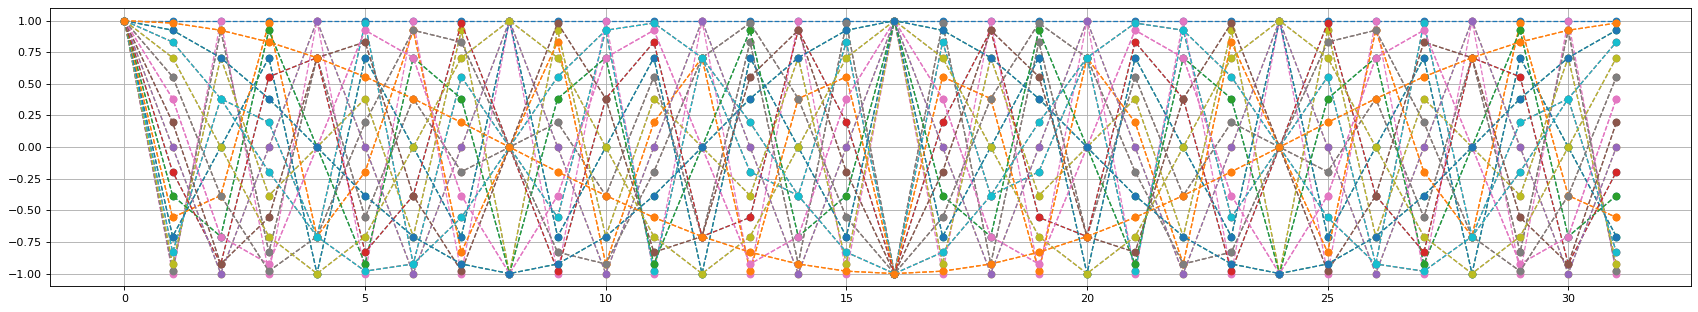

In [38]:

N = 32
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Считаем поворотные множители по формуле
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)


# ВЫводим поворотные множители
fig = plt.figure(figsize=(42, 4), dpi=80)

plt.subplot(1, 2, 1)
for i in range(N):
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.tight_layout()

### ДЗ Про

В соответствии с эффектом Гиббса, при резких скачках исходного сигнала попытка обратного преобразования Фурье приводит к пульсациям в восстановленном сигнале.

Поиллюстрируйте данный эффект графически, создав сигнал с резкими скачками и проведя восстановление сигнала из его Фурье спектра


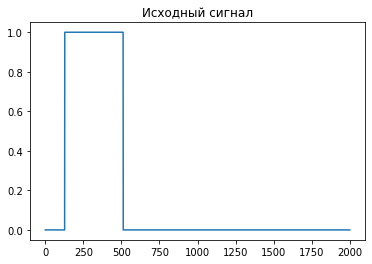

In [24]:
N = 2000
x = np.zeros(N)
t = np.array(range(N))    # отсчеты времени
x[128:512] = 1

plt.plot(x)
plt.title('Исходный сигнал')
plt.show()

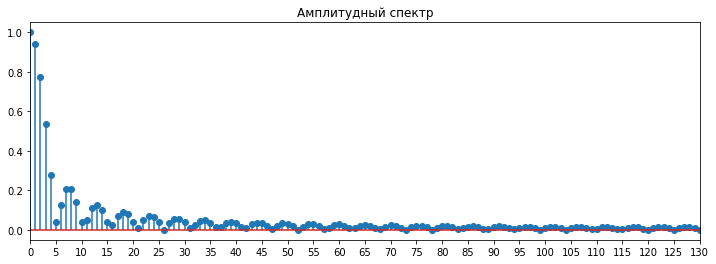

In [25]:
xFFT = fft(x, N)
xA = np.abs(xFFT) / np.abs(xFFT).max() 

plt.figure(figsize=(12, 4))
plt.stem(xA, use_line_collection=True)
plt.xlim(0, 130)
plt.title('Амплитудный спектр')
plt.xticks(np.linspace(0, 130, 27))

plt.show()

In [26]:
# Из графика видно, что исходный сигнал состоит из множества гармоник, 
# однако, сила влияния этих гармоник уменьшается, если двигаться по графику слева направо

# Сделаем обратное преобразование Фурье для первых двух значений спектра, занулив все остальные значения
xA_2 = xFFT.copy()
xA_2[2:] = 0
x_2_harm = ifft(xA_2)
print(x_2_harm)

[0.28899221-0.15230592j 0.28947021-0.15200046j 0.28994725-0.1516935j  ...
 0.28755247-0.15321327j 0.28803333-0.15291233j 0.28851325-0.15260988j]


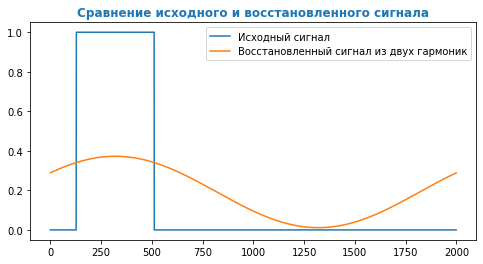

In [27]:
# Выведем получившийся сигнал на график, предварительно отбросив мнимую часть значений x_2
x_2_harm = np.real(x_2_harm)
plt.figure(figsize=(8, 4))
plt.plot(x, label='Исходный сигнал')
plt.plot(x_2_harm, label='Восстановленный сигнал из двух гармоник')
plt.title('Сравнение исходного и восстановленного сигнала', fontdict={'fontweight': 'bold', 'color': 'C0'})
plt.legend()
plt.show()

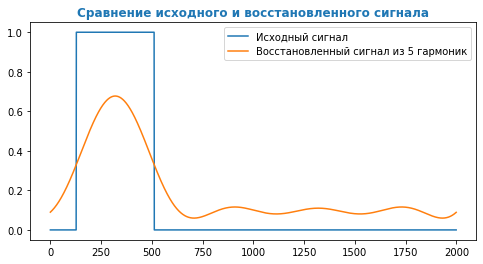

In [28]:
# Получившийся сигнал не очень похож на исходный
# Увеличим количество гармоник 
n = 5
xA_n = xFFT.copy()
xA_n[n:] = 0
x_n_harm = np.real(ifft(xA_n))

plt.figure(figsize=(8, 4))
plt.plot(x, label='Исходный сигнал')
plt.plot(x_n_harm, label='Восстановленный сигнал из {} гармоник'.format(n))
plt.title('Сравнение исходного и восстановленного сигнала', fontdict={'fontweight': 'bold', 'color': 'C0'})
plt.legend()
plt.show()

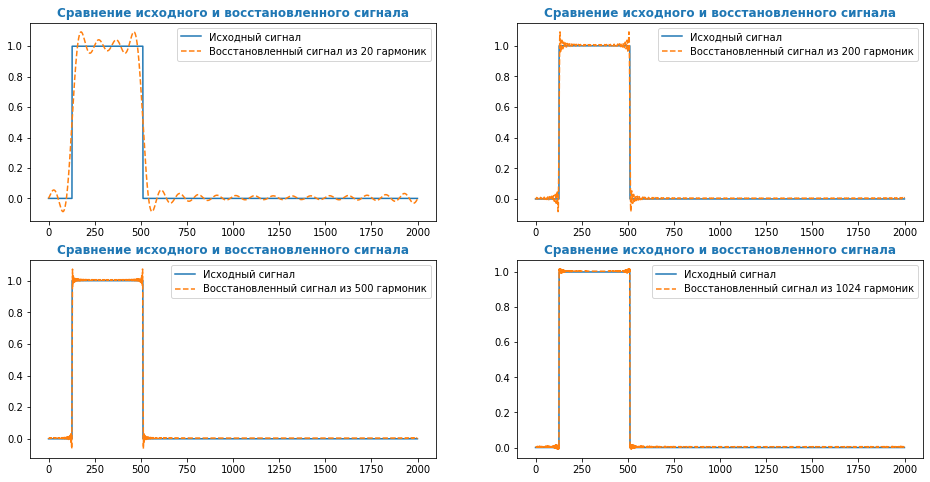

In [29]:
# Прогресс заметен уже на пяти гармониках
# Повторим действия для 20, 200, 500 и 1024 количества гармоник
# Кроме того, скорректируем амплитуду

plt.figure(figsize=(16, 8))
for i, n in enumerate([20, 200, 500, 1024]):
  xA_n = xFFT.copy()
  xA_n[n:] = 0
  x_n_harm = np.real(ifft(xA_n))
  x_n_harm -= 0.09375     # значение вычислено на последнем примере (1024 гармоник)
  x_n_harm *= 2
  plt.subplot(2, 2, i + 1)
  plt.plot(x, label='Исходный сигнал', c='C0')
  plt.plot(x_n_harm, ls='--', c='C1', label='Восстановленный сигнал из {} гармоник'.format(n))
  plt.title('Сравнение исходного и восстановленного сигнала', fontdict={'fontweight': 'bold', 'color': 'C0'})
  plt.legend()
plt.show()

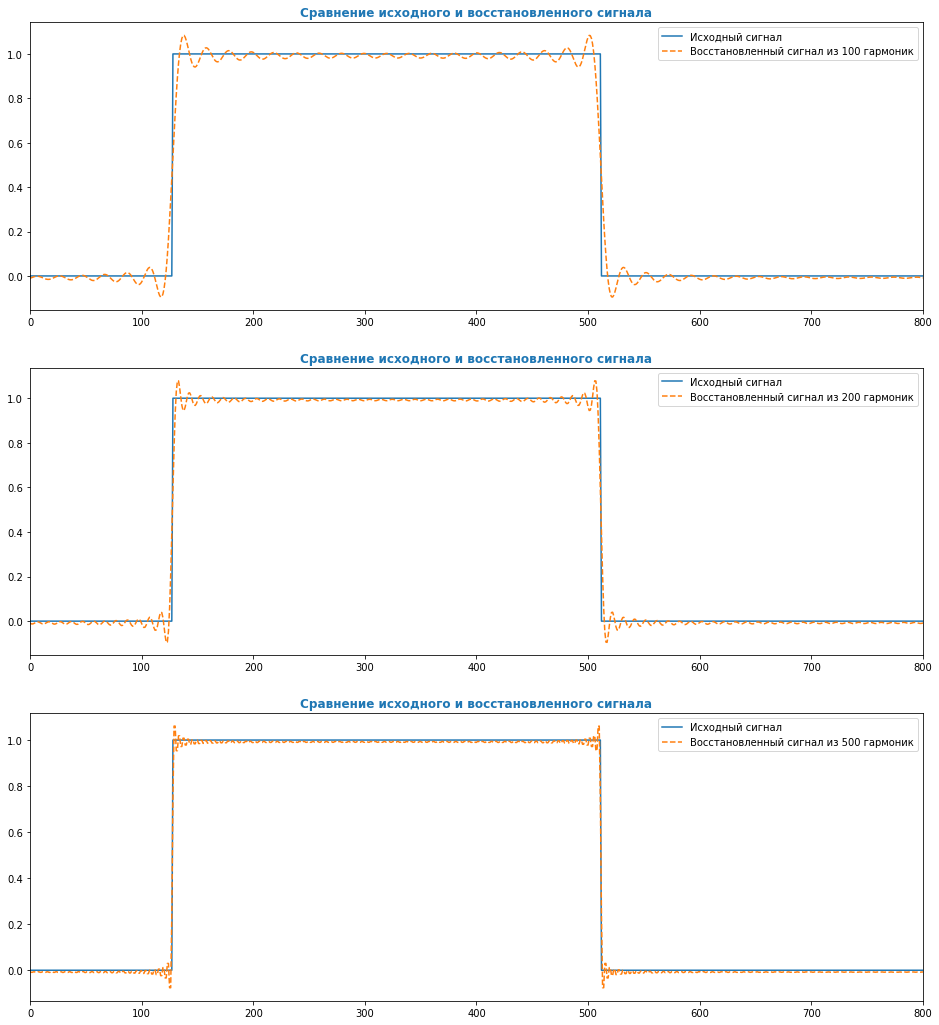

In [30]:
# При восстановлении исходного сигнала 20, 200 и 500 гармониками
# в местах резкого изменения сигнала хорошо заметны отклонения восстановленного сигнала от исходного
# так называемые пульсации

plt.figure(figsize=(16, 18))
for i, n in enumerate([100, 200, 500]):
  xA_n = xFFT.copy()
  xA_n[n:] = 0
  x_n_harm = np.real(ifft(xA_n))
  x_n_harm -= 0.1     # значение вычислено на последнем примере (1024 гармоник)
  x_n_harm *= 2
  plt.subplot(3, 1, i + 1)
  plt.plot(x, label='Исходный сигнал', c='C0')
  plt.plot(x_n_harm, ls='--', c='C1', label='Восстановленный сигнал из {} гармоник'.format(n))
  plt.title('Сравнение исходного и восстановленного сигнала', fontdict={'fontweight': 'bold', 'color': 'C0'})
  plt.xlim(0, 800)
  plt.legend()
plt.show()